In [2]:
import numpy as np
import pandas as pd   
import seaborn as sns  
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Ecommerce dataset.csv", encoding= 'unicode_escape')

## EXPLORATORY DATA ANALYSIS

In [4]:
## observation of the shape

df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### Observation

- The median quantity bought is 3 at 2.08$ unitprice.
- there are negative values for min unit price and quantity

In [7]:
df.describe(include="O")

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


In [8]:
## checking for missing values

df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

#### observation

- customer ID has 24% missing values and description has 0.27% missing values

In [17]:
## checking the negative unitprice & Quantity.

df = df.loc[df['UnitPrice'] > 0]

In [18]:
df = df[(~df['InvoiceNo'].str.startswith('C'))]

In [19]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [21]:
df.isnull().mean()*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.942275
Country         0.000000
dtype: float64

In [23]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## 1. Analyze revenues from each country and quantity of products sold.

In [25]:
# calculating total sold

df['Totalsold'] = df['Quantity'] * df['UnitPrice']

In [27]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Totalsold
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [32]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [81]:
df.groupby(['Country'])[['Totalsold', 'Quantity']].sum()

,Totalsold,Quantity
Country,,
Australia,138521.310,83901
Austria,10198.680,4881
Bahrain,754.140,314
Belgium,41196.340,23237
Brazil,1143.600,356
Canada,3666.380,2763
Channel Islands,20450.440,9491
Cyprus,13590.380,6361
Czech Republic,826.740,671


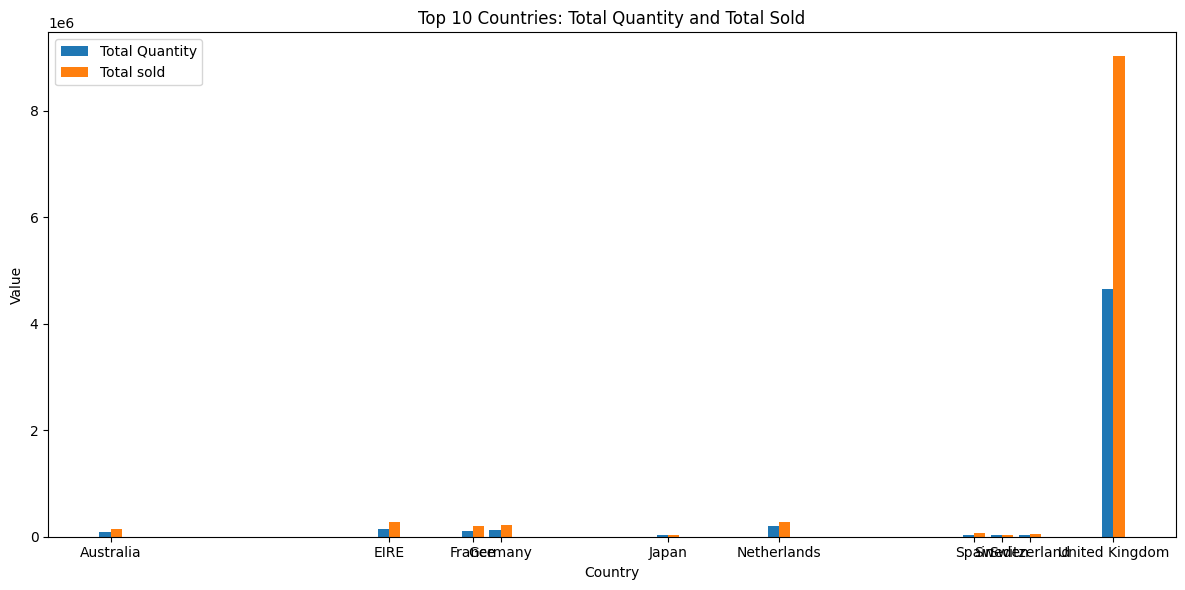

In [83]:
# Create a side-by-side column chart
plt.figure(figsize=(12, 6))

plt.bar(top_countries.index - 0.2, top_countries['Quantity'], width=0.4, label='Total Quantity')
plt.bar(top_countries.index + 0.2, top_countries['Totalsold'], width=0.4, label='Total sold')

plt.xlabel('Country')
plt.ylabel('Value')
plt.title('Top 10 Countries: Total Quantity and Total Sold')
plt.xticks(top_countries.index, top_countries['Country'])
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
df.groupby(['Country'])['Totalsold'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    9025222.084
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Australia          138521.310
Spain               61577.110
Switzerland         57089.900
Belgium             41196.340
Sweden              38378.330
Name: Totalsold, dtype: float64

In [45]:
df.groupby(['Country'])['Quantity'].sum().sort_values(ascending=False).head(10)

Country
United Kingdom    4662390
Netherlands        200361
EIRE               147173
Germany            119261
France             112103
Australia           83901
Sweden              36083
Switzerland         30629
Spain               27940
Japan               26016
Name: Quantity, dtype: int64

In [ ]:
# ASIGNMENT 
# box plot for quantity accross the different countries
# top 10 countries in total quantity and total sold usinf column chart

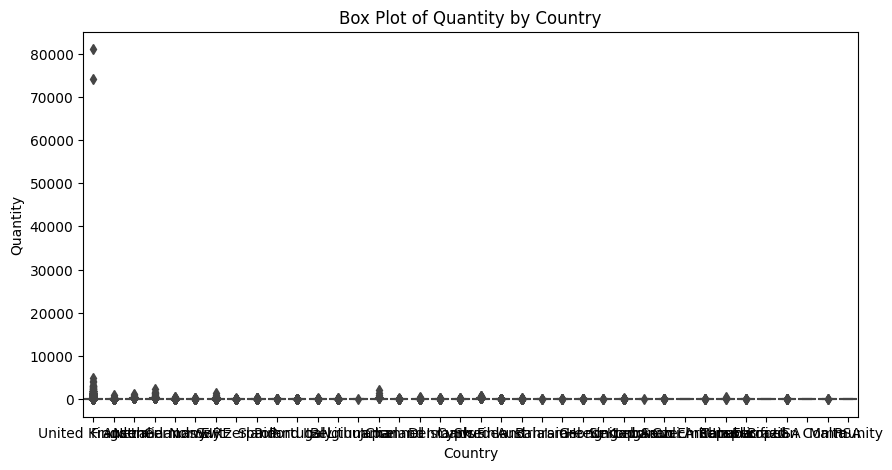

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Country', y='Quantity', data=df)
plt.title('Box Plot of Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.show()

## 2. Highlight the TOP 10 highest buying customers and their originating countries.

In [49]:
df.groupby(['CustomerID'])[['Totalsold', 'Quantity', 'InvoiceNo']].agg({'Totalsold': 'sum', 'Quantity': 'mean', 'InvoiceNo' : 'nunique'})

,Totalsold,Quantity,InvoiceNo
CustomerID,,,
12346.0,77183.60,74215.000000,1
12347.0,4310.00,13.505495,7
12348.0,1797.24,75.516129,4
12349.0,1757.55,8.643836,1
12350.0,334.40,11.588235,1
...,...,...,...
18280.0,180.60,4.500000,1
18281.0,80.82,7.714286,1
18282.0,178.05,8.583333,2


In [70]:

total_10_customer_sales = df.groupby(['CustomerID'])['Totalsold'].sum().sort_values(ascending=False).head(10)
total_10_customer_sales

CustomerID
14646.0    280206.02
18102.0    259657.30
17450.0    194550.79
16446.0    168472.50
14911.0    143825.06
12415.0    124914.53
14156.0    117379.63
17511.0     91062.38
16029.0     81024.84
12346.0     77183.60
Name: Totalsold, dtype: float64

In [ ]:
#plot visuals

In [71]:
top_10_Quantitybought = df.groupby(['CustomerID'])['Quantity'].mean().sort_values(ascending=False).head(10)
top_10_Quantitybought

CustomerID
12346.0    74215.0
16446.0    26999.0
13135.0     4300.0
16754.0     2140.0
16308.0     2000.0
18087.0     1953.5
15749.0     1802.8
14609.0     1756.5
15118.0     1440.0
15195.0     1404.0
Name: Quantity, dtype: float64

In [ ]:
#plot visuals

In [72]:
top_10_InvoiceNo = df.groupby(['CustomerID'])['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
top_10_InvoiceNo

CustomerID
12748.0    209
14911.0    201
17841.0    124
13089.0     97
14606.0     93
15311.0     91
12971.0     86
14646.0     73
16029.0     63
13408.0     62
Name: InvoiceNo, dtype: int64

In [54]:
# plot visuals

## countries

In [73]:
top_customers = list(set(list(total_10_customer_sales.index) + list(top_10_Quantitybought.index) + list(top_10_InvoiceNo.index)))
top_customers

[15749.0,
 15118.0,
 14606.0,
 14609.0,
 16029.0,
 13089.0,
 18087.0,
 17450.0,
 12971.0,
 17841.0,
 16308.0,
 18102.0,
 14646.0,
 12346.0,
 16446.0,
 14911.0,
 14156.0,
 12748.0,
 13135.0,
 15311.0,
 15195.0,
 13408.0,
 17511.0,
 16754.0,
 12415.0]

In [68]:
df[df['CustomerID'].isin(top_customers)].groupby(['Country']).CustomerID.nunique()

Country
Australia          1
EIRE               2
Netherlands        1
United Kingdom    21
Name: CustomerID, dtype: int64

In [ ]:
# PLOT VISUALS PIECHART